In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [94]:
data = pd.read_csv('data.csv')
data.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [95]:
data.drop(['Person ID','Blood Pressure'],axis = 1,inplace = True)

In [96]:
data['BMI Category'].replace('Normal Weight', 'Normal', inplace=True)
data['Occupation'].replace('Salesperson', 'Sales Representative', inplace=True)
data['BMI Category'].replace('Obese', 'Overweight', inplace=True)

In [97]:
data.head(2)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None


In [98]:
data.dropna(inplace=True)

In [99]:
print(data.describe())
print(type(data))

              Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
count  374.000000      374.000000        374.000000               374.000000   
mean    42.184492        7.132086          7.312834                59.171123   
std      8.673133        0.795657          1.196956                20.830804   
min     27.000000        5.800000          4.000000                30.000000   
25%     35.250000        6.400000          6.000000                45.000000   
50%     43.000000        7.200000          7.000000                60.000000   
75%     50.000000        7.800000          8.000000                75.000000   
max     59.000000        8.500000          9.000000                90.000000   

       Stress Level  Heart Rate   Daily Steps  
count    374.000000  374.000000    374.000000  
mean       5.385027   70.165775   6816.844920  
std        1.774526    4.135676   1617.915679  
min        3.000000   65.000000   3000.000000  
25%        4.000000   68.000000   5600.

In [100]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in data.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {data[col].unique()}")

Gender: ['Male' 'Female']
Occupation: ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Manager']
BMI Category: ['Overweight' 'Normal']
Sleep Disorder: ['None' 'Sleep Apnea' 'Insomnia']


In [101]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in data.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(data[col].unique())

    # Transform the column using the encoder
    data[col] = label_encoder.transform(data[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {data[col].unique()}")

Gender: [1 0]
Occupation: [8 1 6 9 5 2 0 7 3 4]
BMI Category: [1 0]
Sleep Disorder: [1 2 0]


<Axes: >

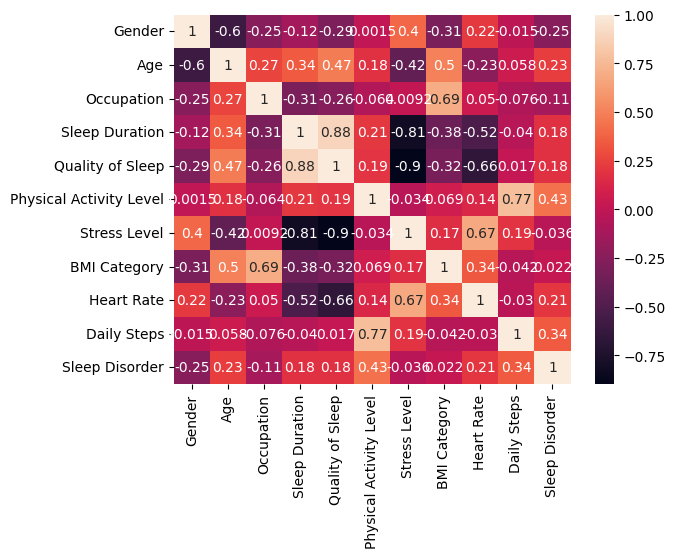

In [102]:
sns.heatmap(data.corr(), fmt = '.2g', annot = True)

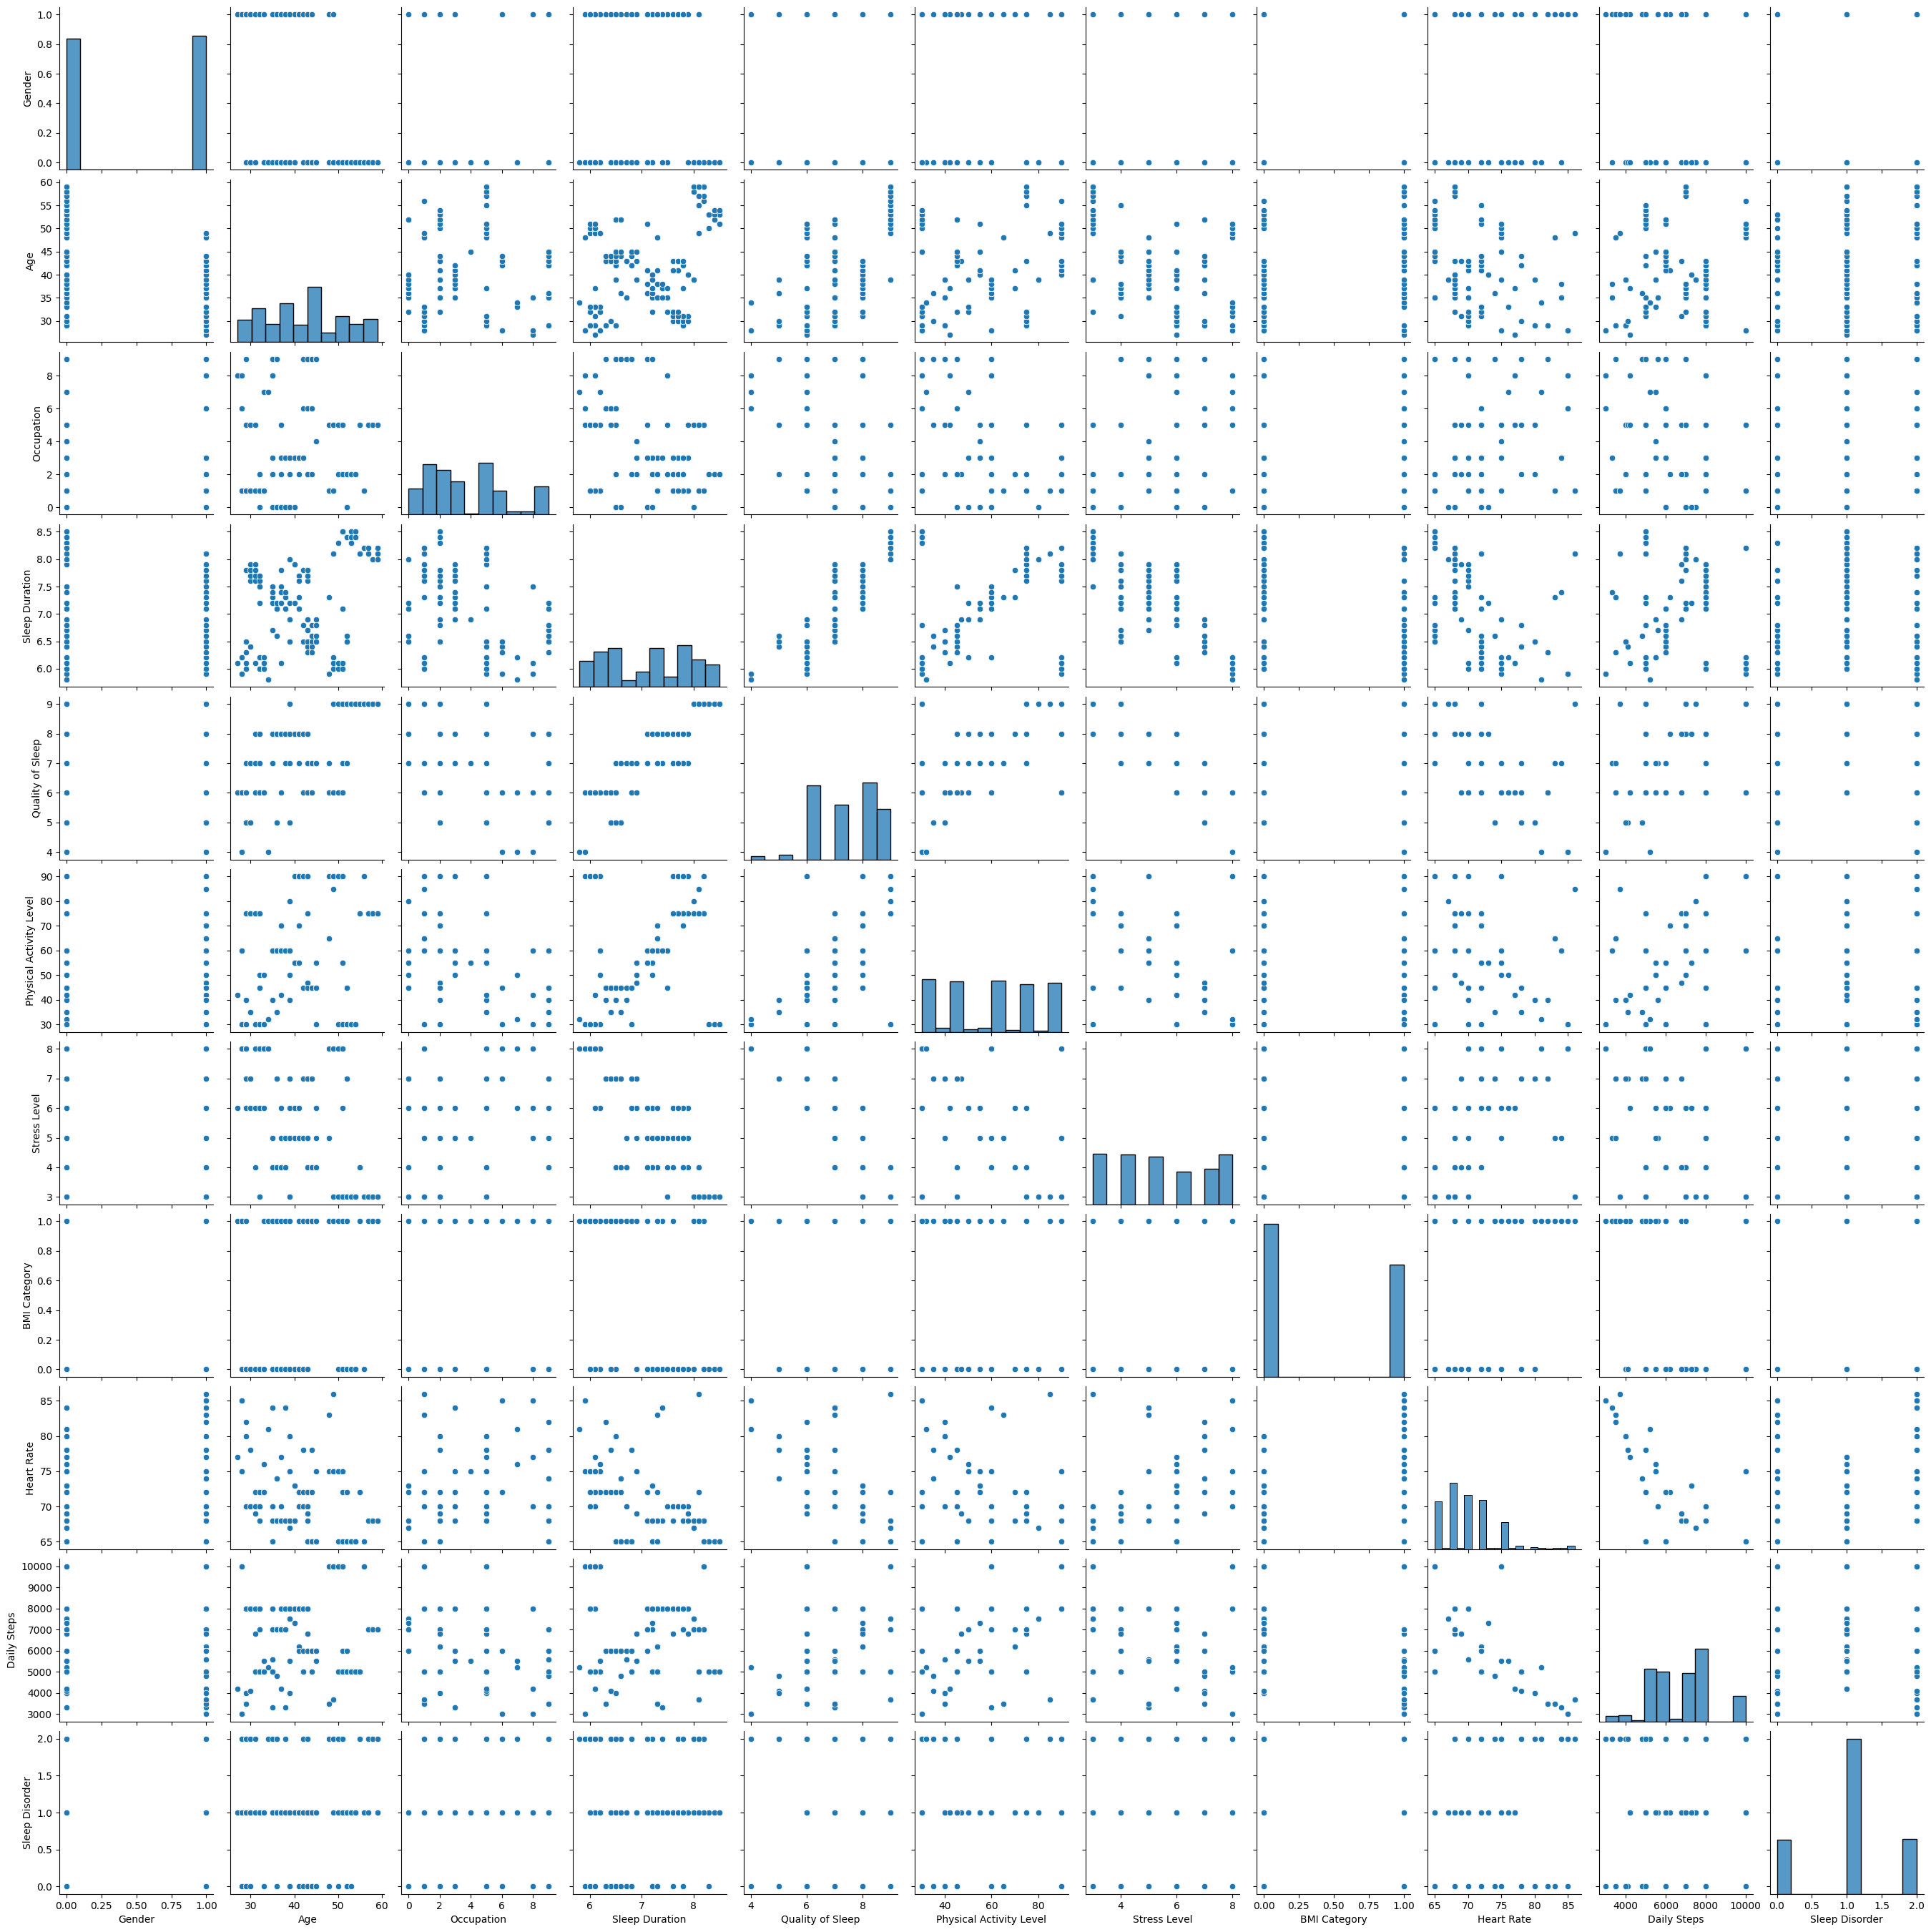

In [103]:
import seaborn as sns
sns.pairplot(data)

In [104]:
X = data.drop('Sleep Disorder', axis=1)
y = data['Sleep Disorder']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [105]:
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['Heart Rate']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

val = 3

# Find the indices of outliers based on the val
outliers = np.where(z_scores > val)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outliers])
y_train = y_train.drop(y_train.index[outliers])

In [106]:
print(X_train.head(5))
print(y_train.head(5))

     Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
191       1   43           6             6.4                 6   
282       0   50           5             6.0                 6   
270       0   49           5             6.1                 6   
213       1   43           2             7.8                 8   
63        1   32           1             6.2                 6   

     Physical Activity Level  Stress Level  BMI Category  Heart Rate  \
191                       45             7             1          72   
282                       90             8             1          75   
270                       90             8             1          75   
213                       90             5             0          70   
63                        30             8             0          72   

     Daily Steps  
191         6000  
282        10000  
270        10000  
213         8000  
63          5000  
191    0
282    2
270    2
213    1
63     1
Name: Sleep

In [107]:
logReg = LogisticRegression()
logReg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [108]:
logReg.predict([[1,28,1,6.2,6,60,8,0,75,10000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [109]:
preds = logReg.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, preds)
print('MSE:', mse)

MSE: 0.18666666666666668


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [32]:
d_Tree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [2,3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0,24,42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(d_Tree, param_grid, cv=10)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [33]:
d_Tree = DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_leaf=3, min_samples_split=2, class_weight='balanced')
d_Tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, min_samples_leaf=3,
                       random_state=0)

In [34]:
from sklearn.metrics import accuracy_score
pred = d_Tree.predict(X_test)
print(pred)
print("Accuracy Score :", round(accuracy_score(y_test, pred)*100 ,2), "%")

[1 2 0 1 2 1 0 0 1 1 1 1 1 2 2 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1
 1 1 1 1 2 0 2 1 1 2 2 0 1 0 1 0 1 1 2 1 1 1 1 0 0 0 0 0 1 1 2 0 0 1 1 1 2
 1]
Accuracy Score : 88.0 %


In [35]:
print(d_Tree.predict([[0,50,5,6,6,90,8,3,75,10000]])[0])

2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [110]:
import pickle

# Save the model to a file
pickle.dump(logReg, open('sleep_disorder.sav',"wb"))

In [ ]:
model.predict([[0,50,5,6,6,90,8,3,75,10000]])